In [3]:
# Input Labels
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
df.describe()

,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


# Scaling Variables

In [6]:
from sklearn.preprocessing import MinMaxScaler

msc_x = MinMaxScaler()
msc_y = MinMaxScaler()

x_scaled =  msc_x.fit_transform(df[['area' , 'bedrooms']])
y_scaled = msc_y.fit_transform( df[['price']] )

In [7]:
x_scaled[:2] , y_scaled[:2].reshape(2,)

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ]]),
 array([0.05237037, 0.65185185]))

In [8]:
y_scaled = y_scaled.reshape(len(y_scaled),)
y_scaled

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x_scaled , y_scaled , test_size=0.2 ,random_state=25 )

In [10]:
x_train.shape , x_test.shape ,y_train.shape

((16, 2), (4, 2), (16,))

# Build Model with Tenserflow

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(  11, input_shape = (2 , )   ) ,
    
] )

model.compile( 
              optimizer='adam',
              loss ='mse',
              )

model.fit(x_train , y_train , epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 862ms/step - loss: 0.2076
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2063
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2050
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2037
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2024
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.2011
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1999
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1986
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1974
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1961
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1949
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1936
Epoch 13/100
1/1 [==============================

In [12]:
model.evaluate(x_test , y_test)

1/1 [==============================] - 0s 313ms/step - loss: 0.1051


0.10508619248867035

In [13]:
model.get_weights()

[array([[ 0.73107505,  0.57486016,  0.2570104 ,  0.07477425,  0.0690865 ,
          0.08671983,  0.74522454, -0.37709102, -0.12116564, -0.04304525,
          0.4381175 ],
        [ 0.1812374 , -0.45917416,  0.288254  ,  0.07267904,  0.38787428,
          0.73358154,  0.07315923,  0.46335268,  0.5949174 , -0.49689803,
         -0.52957314]], dtype=float32),
 array([ 0.0065255 ,  0.09179606,  0.07751241,  0.08985071,  0.0804031 ,
        -0.02318431,  0.05254509,  0.08903171,  0.07594671,  0.09497588,
         0.09326365], dtype=float32)]

In [14]:
def convert_price(prices):
    return msc_y.inverse_transform(prices)

In [15]:
y_pred = model.predict(x_test)
convert_price(y_pred)

1/1 [==============================] - 0s 205ms/step


array([[ 49.207546,  36.92356 ,  55.782032,  47.627026,  56.910004,
         54.83958 ,  51.970158,  54.391163,  60.63913 ,  27.450287,
         32.836037],
       [118.78635 ,  51.021137,  95.39899 ,  58.398125,  88.510635,
        111.158615, 115.363556,  56.08858 ,  91.29186 ,  -9.466784,
         31.455635],
       [ 66.89546 ,  30.525082,  69.57846 ,  51.26344 ,  71.09424 ,
         80.97053 ,  66.23438 ,  64.060875,  78.79983 ,   9.998675,
         21.897285],
       [ 79.14728 ,  40.158947,  73.885605,  52.516552,  72.25203 ,
         82.42383 ,  78.72332 ,  57.74135 ,  76.769264,   9.277299,
         29.239532]], dtype=float32)

In [16]:
convert_price([y_test])

array([[ 40., 140.,  62.,  82.]])

In [17]:
# loss function
# loss = 
def mean_squarred_error(y_true , y_pred):
    return np.mean( np.square( y_true - y_pred))
    
y_true = np.array([0 , 0.5])
y_pred = np.array([2 , 1])


mean_squarred_error(y_true, y_pred)


2.125

# 1. Batch Gradient Descent (BGD):

In BGD, the entire training dataset is used to compute the gradient of the loss function with respect to the parameters in a single step.
It provides a precise estimate of the gradient, leading to more stable convergence.
BGD can be slow for large datasets since it requires processing the entire dataset in each iteration, which can be computationally expensive.
It may get stuck in local minima.

In [18]:
def show_plot(x, y):
    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.plot(x,y)
    plt.show()
    

Epoch:1, weights : [0.76571956 0.71827658],  bias:-0.4813516922094508, loss:0.2859287105946281 
Epoch:2, weights : [0.82017742 0.79625396],  bias:-0.26596271026258145, loss:0.05837816367608716 
Epoch:3, weights : [0.76778133 0.73859095],  bias:-0.3218847014264452, loss:0.022334390116422423 
Epoch:4, weights : [0.76030991 0.73562221],  bias:-0.2762184208863658, loss:0.015127838234369185 
Epoch:5, weights : [0.73893554 0.71383102],  bias:-0.2721693156715699, loss:0.012568496569602704 
Epoch:6, weights : [0.72592788 0.70127317],  bias:-0.25435205351374773, loss:0.010996556846587999 
Epoch:7, weights : [0.7123863  0.68693977],  bias:-0.24383887283391864, loss:0.009808746253392769 
Epoch:8, weights : [0.70144191 0.67487895],  bias:-0.23230349131386038, loss:0.00886704803408839 
Epoch:9, weights : [0.69162733 0.66336451],  bias:-0.22275717487523344, loss:0.008112331386428032 
Epoch:10, weights : [0.68327337 0.65291074],  bias:-0.21386883849183136, loss:0.007505080292331455 
Epoch:11, weights

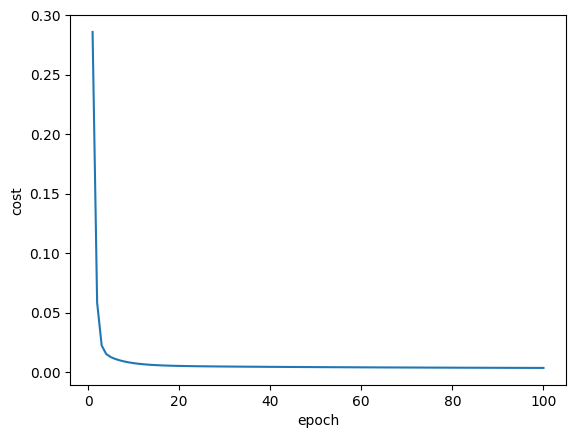

In [19]:
def Batch_GD(x_train  ,y_train,  epoches ,learning_rate=0.2, loss_threshold = 0.1):
    
    ( total_samples , total_features) = x_train.shape
    
    # initialize weights and bias
    weights = np.ones(total_features)
    bias = 0 

    cost_list = []
    epoch_list = []
    
    for i in range(1 , epoches+1):
        
        # calculated weighted sum of age and affordiblity features
        y_pred =   np.dot( weights , x_train.T  ) + bias
        
        #calculating the loss btw the actual and predicted using loss function
        loss = mean_squarred_error( y_train , y_pred)
        
        d_weights = -(2/ total_samples)*(np.dot( x_train.T , (y_train - y_pred))) 
        d_bias =  -(2/total_samples)* np.sum(  y_train - y_pred)
        
        # adjust weights and bias to reduce the loss with help of learning_rate , derivated weights
        # new_w = w * learning_rate - dw
        
        
        weights = weights - learning_rate  * d_weights
        bias = bias - learning_rate  * d_bias

        
        if i%1==0:
            print (f'Epoch:{i}, weights : {weights},  bias:{bias}, loss:{loss} ')
            cost_list.append(loss)
            epoch_list.append(i)
            
        if loss<=loss_threshold:
                print (f'Final - Epoch:{i}, weights : {weights},  bias:{bias}, loss:{loss} ')
                break
            
    return weights, bias ,cost_list  , epoch_list
        
(weights, bias ,cost_list  , epoch_list) = Batch_GD(x_train , y_train ,epoches = 100 , learning_rate=0.5, loss_threshold = 0.002 )
show_plot(epoch_list , cost_list)


In [20]:
def predict_price(weights , bias , x_test):
    y_pred = np.dot(weights  , x_test.T) + bias
    return y_pred 

def convert_price(y):
    return  msc_y.inverse_transform([y])
    
y_pred =predict_price(weights , bias , x_test) 
print('pred : ' , convert_price(y_pred))
print('true : ' ,  convert_price(y_test))

pred :  [[ 41.18261451 126.42557692  65.99120873  78.75268   ]]
true :  [[ 40. 140.  62.  82.]]


# 2.Stochastic Gradient Descent (SGD):

In SGD, only a single randomly selected data point (or a few data points) is used to compute the gradient in each iteration.
It introduces randomness, which can help escape local minima and may converge faster due to frequent updates.
SGD can have a noisy gradient estimate, leading to oscillations and slower convergence towards the end.
Because of its randomness, SGD can exhibit more erratic behavior compared to other methods.

Epoch:1, weights : [0.99881672 0.99571061],  bias:-0.017157567049808427, loss:0.07536181940957999 
Epoch:2, weights : [0.99306803 0.97936628],  bias:-0.04984621570897598, loss:0.2735482242975992 
Epoch:3, weights : [0.9873464  0.96785954],  bias:-0.07285969478754847, loss:0.13558277614077288 
Epoch:4, weights : [0.98209388 0.95729622],  bias:-0.09398633863431971, loss:0.11426178053844914 
Epoch:5, weights : [0.95945205 0.94063092],  bias:-0.12731695020984085, loss:0.2843979950075557 
Epoch:6, weights : [0.95529295 0.92880603],  bias:-0.15096672503549996, loss:0.14318383342192123 
Epoch:7, weights : [0.95146682 0.91792782],  bias:-0.1727231469755549, loss:0.12117552528222847 
Epoch:8, weights : [0.93383782 0.89662611],  bias:-0.20112542685970872, loss:0.20651251267015885 
Epoch:9, weights : [0.91835488 0.87791756],  bias:-0.22607016292751764, loss:0.15929340351811788 
Epoch:10, weights : [0.91453016 0.87042318],  bias:-0.2410589153888335, loss:0.05751365128873035 
Epoch:11, weights : [0

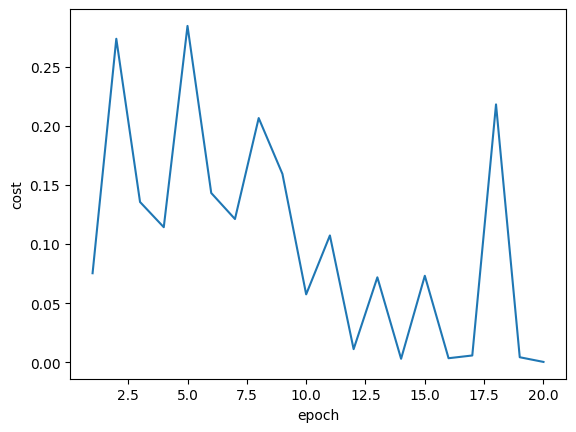

In [21]:
import random
np.random.seed(0)

def stochastic_GD(x_train  ,y_train,  epoches ,learning_rate=0.2, loss_threshold = 0.1):
    
    ( total_samples , total_features) = x_train.shape
    
    # initialize weights and bias
    weights = np.ones(total_features)
    bias = 0 

    cost_list = []
    epoch_list = []
    
    for i in range(1 , epoches+1):
        
        random_sample_index = random.randint(0,total_samples-1) # random index from traing sample
        
        x_sample =  x_train[ random_sample_index] 
        y_sample =  y_train[random_sample_index]
        
        # calculated weighted sum of age and affordiblity features
        y_pred =   np.dot( weights , x_sample.T  ) + bias
        
        #calculating the loss btw the actual and predicted using loss function
        loss = mean_squarred_error( y_sample , y_pred)
        
        d_weights = -(2/ total_samples)*(np.dot( x_sample.T , (y_sample - y_pred))) 
        d_bias =  -(2/total_samples)* np.sum(  y_sample - y_pred)
        
        # adjust weights and bias to reduce the loss with help of learning_rate , derivated weights
        # new_w = w * learning_rate - dw
        
        
        weights = weights - learning_rate  * d_weights
        bias = bias - learning_rate  * d_bias

        
        if i%1==0:
            print (f'Epoch:{i}, weights : {weights},  bias:{bias}, loss:{loss} ')
            cost_list.append(loss)
            epoch_list.append(i)
            
        if loss<=loss_threshold:
                print (f'Final - Epoch:{i}, weights : {weights},  bias:{bias}, loss:{loss} ')
                break
            
    return weights, bias ,cost_list  , epoch_list
        
(weights, bias ,cost_list  , epoch_list) = stochastic_GD(x_train , y_train ,epoches = 100 , learning_rate=0.5, loss_threshold = 0.002 )
show_plot(epoch_list , cost_list)

In [22]:
y_pred =predict_price(weights , bias , x_test) 
print('true : ' ,  convert_price(y_test))
print('pred : ' , convert_price(y_pred))

true :  [[ 40. 140.  62.  82.]]
pred :  [[ 32.69441302 155.09858589  73.81239901  88.20100828]]


# 3.Mini-batch Gradient Descent:

Mini-batch Gradient Descent strikes a balance between BGD and SGD by dividing the training dataset into small batches (e.g., 32, 64, 128 samples) and computing the gradient based on each mini-batch.
It combines the benefits of both BGD and SGD: stability from larger batch sizes and faster convergence from frequent updates.
Mini-batch GD is the most commonly used method in practice, as it provides a good compromise between efficiency and convergence speed.
The choice of mini-batch size can influence the behavior of the optimization process.

In [23]:
import random
t = 10
min_ = random.randrange(0 , t-5  )  
max_ = min_ + 5
(min_ , max_)

(2, 7)

Epoch:1, weights : [0.92161767 0.89913893],  bias:-0.14780092592592592, loss:0.3339491501233915 
Epoch:2, weights : [0.86984433 0.84214105],  bias:-0.2397168445593582, loss:0.09970139848566764 
Epoch:3, weights : [0.864495   0.82980688],  bias:-0.24926497734200284, loss:0.027302552549065995 
Epoch:4, weights : [0.82909039 0.78793151],  bias:-0.28962186012765034, loss:0.06673594845809887 
Epoch:5, weights : [0.80537051 0.76018489],  bias:-0.30655121943154817, loss:0.04330996218841256 
Epoch:6, weights : [0.8002261  0.75628523],  bias:-0.3101334073667242, loss:0.005407956334557482 
Epoch:7, weights : [0.79958017 0.75505979],  bias:-0.2868891644633404, loss:0.025327776937108953 
Epoch:8, weights : [0.79309464 0.74874396],  bias:-0.29258376565781896, loss:0.00431442949736894 
Epoch:9, weights : [0.77573572 0.72950572],  bias:-0.2942220064673295, loss:0.034081859787759586 
Epoch:10, weights : [0.76120692 0.71371406],  bias:-0.2910155212051854, loss:0.030162241658158773 
Epoch:11, weights : 

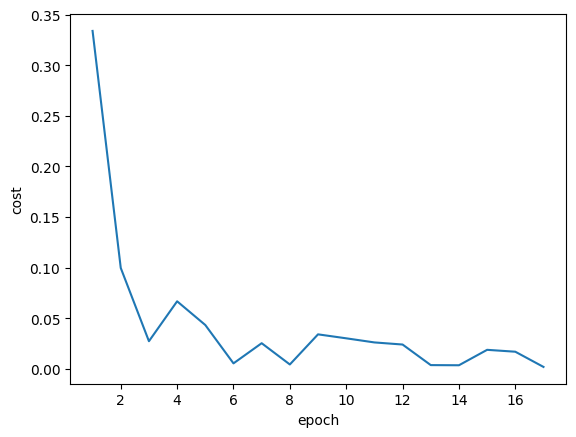

In [24]:
def MiniBatch_GD(x_train  ,y_train,  epoches ,learning_rate=0.2, loss_threshold = 0.1):
    
    ( total_samples , total_features) = x_train.shape
    sample_size = 5
    
    # initialize weights and bias
    weights = np.ones(total_features)
    bias = 0 

    cost_list = []
    epoch_list = []
    
    for i in range(1 , epoches+1):
        
        random_min_index = random.randrange(0,total_samples-sample_size ) # random index from traing sample
        random_max_index = random_min_index + sample_size # random index from traing sample
        
        x_sample =  x_train[ random_min_index : random_max_index] 
        y_sample =  y_train[random_min_index : random_max_index ] 
        
        # calculated weighted sum of age and affordiblity features
        y_pred =   np.dot( weights , x_sample.T  ) + bias
        
        #calculating the loss btw the actual and predicted using loss function
        loss = mean_squarred_error( y_sample , y_pred)
        
        d_weights = -(2/ total_samples)*(np.dot( x_sample.T , (y_sample - y_pred))) 
        d_bias =  -(2/total_samples)* np.sum(  y_sample - y_pred)
        
        # adjust weights and bias to reduce the loss with help of learning_rate , derivated weights
        # new_w = w * learning_rate - dw
        
        
        weights = weights - learning_rate  * d_weights
        bias = bias - learning_rate  * d_bias

        
        if i%1==0:
            print (f'Epoch:{i}, weights : {weights},  bias:{bias}, loss:{loss} ')
            cost_list.append(loss)
            epoch_list.append(i)
            
        if loss<=loss_threshold:
                print (f'Final - Epoch:{i}, weights : {weights},  bias:{bias}, loss:{loss} ')
                break
            
    return weights, bias ,cost_list  , epoch_list
        
(weights, bias ,cost_list  , epoch_list) = MiniBatch_GD(x_train , y_train ,epoches = 100 , learning_rate=0.5, loss_threshold = 0.002 )
show_plot(epoch_list , cost_list)

# codebasics

[0.69094279 0.65785598] -0.21953733259208214 0.0028011149233603053


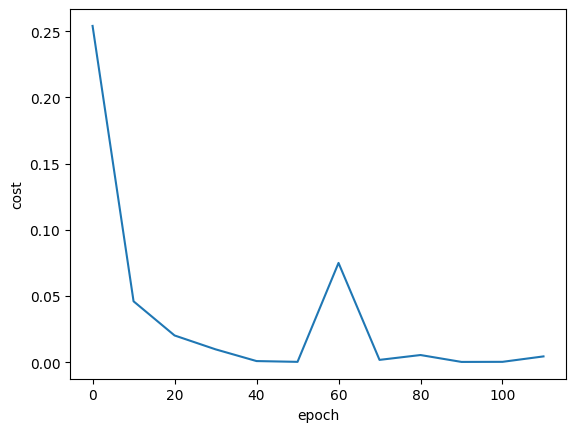

In [26]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    x_train,
    y_train.reshape(y_train.shape[0],),
    epochs = 120,
    batch_size = 5
)
print(w, b, cost)

show_plot(epoch_list , cost_list)
